This Data Set Consists of Insurance Charges Based on Parameters such as Age,Sex,BMI-Body Mass Index,No of Children the person has,whether a person is smoker or not , and atlast Region the person resides.

In [1]:
#importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the Csv file using pandas
df = pd.read_csv('insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#sortng values based on Age Column
df.sort_values(by='age')

,age,sex,bmi,children,smoker,region,charges
1248,18,female,39.820,0,no,southeast,1633.96180
482,18,female,31.350,0,no,southeast,1622.18850
492,18,female,25.080,0,no,northeast,2196.47320
525,18,female,33.880,0,no,southeast,11482.63485
529,18,male,25.460,0,no,northeast,1708.00140
...,...,...,...,...,...,...,...
398,64,male,25.600,2,no,southwest,14988.43200
335,64,male,34.500,0,no,southwest,13822.80300
378,64,female,30.115,3,no,northwest,16455.70785
1265,64,male,23.760,0,yes,southeast,26926.51440


In [5]:
#Checking for Null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#Checking for the datatypes of values in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


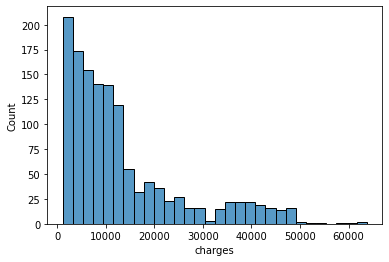

In [8]:
#Histplot to check charges 
sns.histplot(df['charges'])
plt.show()

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
#creation of Dictionary for converting feature inside categorical Columns
dict1 = {'male':0,'female':1}
dict2 = {'yes':1,'no':0}

In [11]:
#updating the created dict. inside the respective columns
df['sex']=df['sex'].replace(dict1)
df['smoker']=df['smoker'].replace(dict2)

In [12]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [13]:
#mapping Regions
df['SW'] = df['region'].apply(lambda x : 1 if "southwest" in x else 0)
df['SE'] = df['region'].apply(lambda x : 1 if "southeast" in x else 0)
df['NW'] = df['region'].apply(lambda x : 1 if "northwest" in x else 0)
df['NE'] = df['region'].apply(lambda x : 1 if "northeast" in x else 0)

In [14]:
df.drop(columns="region",inplace=True)

In [15]:
df

,age,sex,bmi,children,smoker,charges,SW,SE,NW,NE
0,19,1,27.900,0,1,16884.92400,1,0,0,0
1,18,0,33.770,1,0,1725.55230,0,1,0,0
2,28,0,33.000,3,0,4449.46200,0,1,0,0
3,33,0,22.705,0,0,21984.47061,0,0,1,0
4,32,0,28.880,0,0,3866.85520,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,0,1,0
1334,18,1,31.920,0,0,2205.98080,0,0,0,1
1335,18,1,36.850,0,0,1629.83350,0,1,0,0
1336,21,1,25.800,0,0,2007.94500,1,0,0,0


<AxesSubplot:>

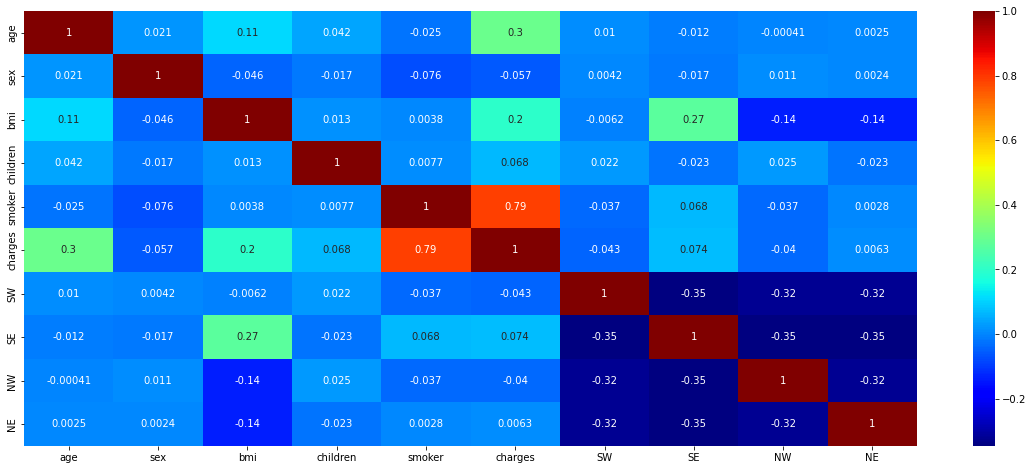

In [16]:
#Correlation between Features and Target 
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,8
sns.heatmap(df.corr(),annot=True,cmap="jet")

In [17]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'SW', 'SE', 'NW',
       'NE'],
      dtype='object')

<Figure size 1008x576 with 0 Axes>

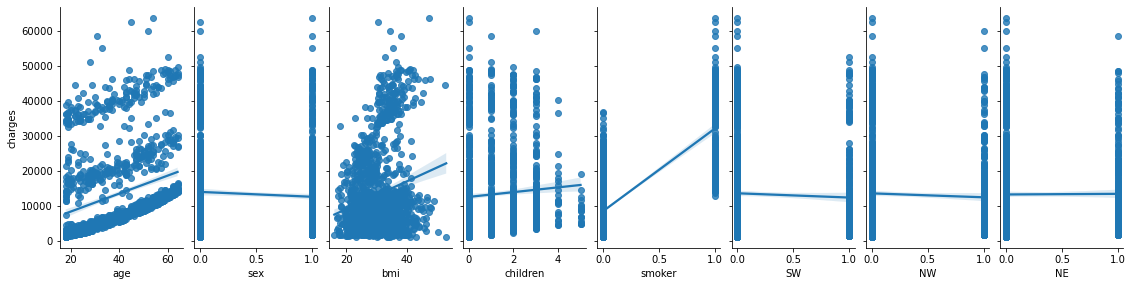

In [18]:
#Pairplot and Relation Between Target and Other Columns to find the Better Features
plt.figure(figsize=(14,8))
sns.pairplot(df,x_vars=['age', 'sex', 'bmi', 'children', 'smoker', 'SW', 'NW', 'NE'],y_vars='charges',height = 4,aspect = 0.5,kind='reg')

In [61]:
#Assigning Features to X 
X = df.drop(columns="charges")
X

,age,sex,bmi,children,smoker,SW,SE,NW,NE
0,19,1,27.900,0,1,1,0,0,0
1,18,0,33.770,1,0,0,1,0,0
2,28,0,33.000,3,0,0,1,0,0
3,33,0,22.705,0,0,0,0,1,0
4,32,0,28.880,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,0,1,0
1334,18,1,31.920,0,0,0,0,0,1
1335,18,1,36.850,0,0,0,1,0,0
1336,21,1,25.800,0,0,1,0,0,0


In [20]:
#Assgning Features target to Y
Y = df["charges"]

In [21]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [22]:
#Standard Scaling of Features 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [24]:
Lr = LinearRegression()

In [25]:
Lr.fit(X_train,Y_train)

LinearRegression()

In [26]:
Y_pred=Lr.predict(X_test)
print(f"r2score",r2_score(Y_test,Y_pred))
print(f"mean_squared_error",mean_squared_error(Y_test,Y_pred))

r2score 0.7951848828535761
mean_squared_error 32244968.180108164


In [27]:
import pickle
file = open("ILR.pkl","wb")
pickle.dump(Lr,file)

# KNN Regressor

In [28]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [30]:
mse = []
r2 = []
for i in range(1,10):
    KNR = KNeighborsRegressor(n_neighbors=i)
    KNR.fit(X_train,Y_train)
    y_pred = KNR.predict(X_test)
    mse_i = mean_squared_error(Y_test,Y_pred)
    mse.append(mse_i)
    r2_i = r2_score(Y_test,Y_pred)
    r2.append(r2_i)
#     print('i = {}, mse = {} , r2 = {}'.format(i,mse_i,r2_i))

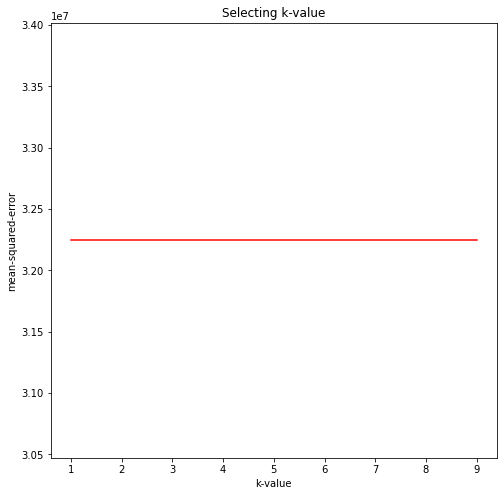

In [31]:
#plotting K values 
plt.figure(figsize = (8,8))
plt.plot(np.arange(1,10),mse,'r')
plt.xlabel('k-value')
plt.ylabel('mean-squared-error')
plt.title('Selecting k-value')
plt.show()

In [32]:
KNR = KNeighborsRegressor(n_neighbors=5)
KNR.fit(X_train,Y_train)
Y_pred = KNR.predict(X_test)

In [33]:
print(f"r2_score",r2_score(Y_test,Y_pred))
print(f"mse",mean_squared_error(Y_test,Y_pred))

r2_score 0.8388007047141819
mse 25378332.515519697


In [34]:
import pickle
file = open("KNR.pkl","wb")
pickle.dump(KNR,file)

# Lasso Regularization

In [35]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score

In [36]:
LaR = Lasso(alpha = 0.1,normalize=True)

In [42]:
LaR.fit(X_train,Y_train)
Y_pred = LaR.predict(X_test)

In [43]:
print(f"r2_score",r2_score(Y_test,Y_pred))
print(f"mse",mean_squared_error(Y_test,Y_pred))

r2_score 0.795859940240184
mse 32138690.84934181


In [44]:
import pickle
file = open("LaR.pkl","wb")
pickle.dump(LaR,file)

# Ridge Regression

In [45]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score

In [47]:
Ri = Ridge(normalize=True)
Ri.fit(X_train,Y_train)
Y_pred = Ri.predict(X_test)
print(f"r2_score",r2_score(Y_test,Y_pred))
print(f"mse",mean_squared_error(Y_test,Y_pred))

r2_score 0.5747189273514055
mse 66953918.47151859


In [48]:
import pickle
file = open("Ri.pkl","wb")
pickle.dump(Ri,file)

# Decision Tree Regressor

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
DTR = DecisionTreeRegressor(random_state = 0)
DTR.fit(X_train,Y_train)
Y_pred =DTR.predict(X_test)
print(f"r2_score",r2_score(Y_test,Y_pred))
print(f"mse",mean_squared_error(Y_test,Y_pred))

r2_score 0.6982970768192587
mse 47498452.7184764


In [51]:
#hyperparameter tuning 
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth' : [1,2,3,4,5,6,7],
    'min_samples_leaf' : [1,2,3,4,5],
    'max_features' : [2,3,4,5,6,7]
}
estimator = DecisionTreeRegressor(random_state = 0)

best_model = GridSearchCV(estimator,param_grid,cv=5)
best_model.fit(X_train,Y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'max_features': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2, 3, 4, 5]})

In [52]:
best_model.best_estimator_

DecisionTreeRegressor(max_depth=4, max_features=7, min_samples_leaf=4,
                      random_state=0)

In [53]:
best_model.best_params_

{'max_depth': 4, 'max_features': 7, 'min_samples_leaf': 4}

In [55]:
DTR=DecisionTreeRegressor(max_depth= 4, max_features= 5, min_samples_leaf= 3)
DTR.fit(X_train,Y_train)
Y_pred = DTR.predict(X_test)
print(f"r2_score",r2_score(Y_test,Y_pred))
print(f"mse",mean_squared_error(Y_test,Y_pred))

r2_score 0.7778819098157699
mse 34969053.31014501


In [56]:
import pickle
file = open("DTR.pkl","wb")
pickle.dump(DTR,file)

# Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
RFR = RandomForestRegressor(random_state=0)
RFR.fit(X_train,Y_train)
Y_pred = RFR.predict(X_test)

In [58]:
from sklearn.metrics import r2_score
print("r2_score",r2_score(Y_test,Y_pred))
print(f"mse",mean_squared_error(Y_test,Y_pred))

r2_score 0.8740468666161076
mse 19829370.188749474


In [59]:
import pickle
file = open("RFR.pkl","wb")
pickle.dump(RFR,file)

In [60]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'SW', 'SE', 'NW',
       'NE'],
      dtype='object')